# Scalar Quantization of Digital Signals

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import math
import numpy as np

In [2]:
def plot_quantizer(x_plot, y_plot, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_label_coords(1,0.40)
    ax.xaxis.set_label_text('Input')
    ax.yaxis.set_label_coords(0.45,.9)
    ax.yaxis.set_label_text('Output')

    ticks = np.arange(-8, 9, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.grid()
    ax.plot(x_plot, y_plot)

In [3]:
def plot(x, y, xlabel='', ylabel='', title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.grid()
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_text(ylabel)
    ax.plot(x, y)

In [4]:
def print_center(x, y, z, n):
    offset = (len(x)-n)//2
    for i in range(n):
        input = int(x[i+offset])
        output = int(y[i+offset])
        recons = int(z[i+offset])
        print(f"{input:>6d} {output:>6d} {recons:>6d}")

## A.  Uniform Quantization

### A.a. Midtread ("round") Quantization

In [269]:
def midtread_quantizer(x, quantization_step):
    return np.round(x / quantization_step)

In [270]:
def midtread_dequantizer(y, quantization_step):
    return y * quantization_step

### A.b. Midrise ("floor") Quantization

In [271]:
def midrise_quantizer(x, quantization_step):
    return np.floor(x / quantization_step)

In [272]:
def midrise_dequantizer(y, quantization_step):
    return y * quantization_step + quantization_step/2

### A.c. Deadzone ("truncation") Quantization

In [273]:
def deadzone_quantizer(x, quantization_step):
    return (x / quantization_step).astype(np.int)

In [274]:
def deadzone_dequantizer(y, quantization_step):
    return y * quantization_step

## B. Non Uniform Quantization

### B.a. Companded (COMpressed + exPANDED) Quantization

#### B.a.1. $\mu$-Law Companded  Quantization

In [40]:
def muLaw_compress(x, mu):
    return np.log(1+mu*np.abs(x))/np.log(1+mu)*np.sign(x)

In [41]:
def muLaw_expand(y, mu):
    return (1/mu)*(((1+mu)**np.abs(y))-1)*np.sign(y)

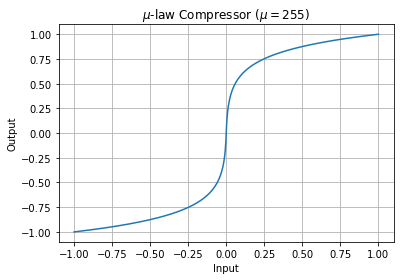

In [42]:
x = np.linspace(-1, 1, 500)

mu = 255
y = muLaw_compress(x, mu)
plot(x, y, "Input", "Output", "$\mu$-law Compressor ($\mu={}$)".format(mu))

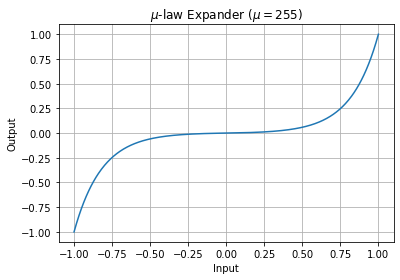

In [43]:
x = np.linspace(-1, 1, 500)

mu = 255
y = muLaw_expand(x, mu)
plot(x, y, "Input", "Output", "$\mu$-law Expander ($\mu={}$)".format(mu))

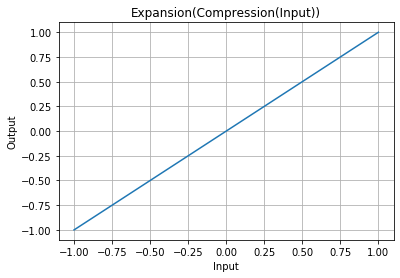

In [44]:
mu = 255
x = np.linspace(-1, 1, 500)
y = muLaw_compress(x, mu)
x_recons = muLaw_expand(y, mu)
plot(x, x_recons, "Input", "Output", "Expansion(Compression(Input))".format(mu))

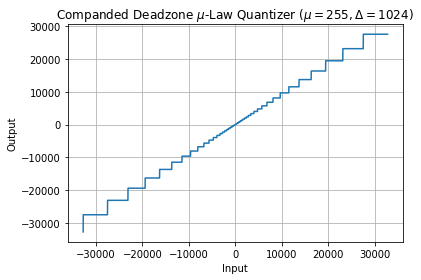

In [45]:
mu = 255
quantization_step = 1024
x = np.linspace(-32768, 32767, 65536)
x_compressed = (32768*(muLaw_compress(x/32768, mu)))
y = deadzone_quantizer(x_compressed, quantization_step)
z_compressed = deadzone_dequantizer(y, quantization_step)
#z_compressed = midtread_dequantizer(y, quantization_step)
z = np.round(32768*muLaw_expand(z_compressed/32768, mu)).astype(np.int16)
plot(x, z, "Input", "Output", "Companded Deadzone $\mu$-Law Quantizer ($\mu={}, \Delta={}$)".format(mu, quantization_step))

## Quantizers I/O comparative

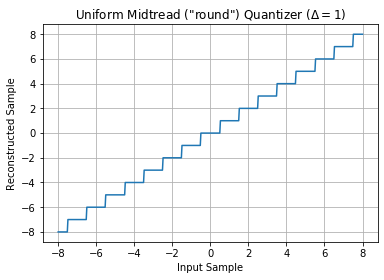

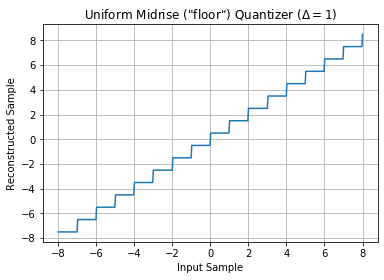

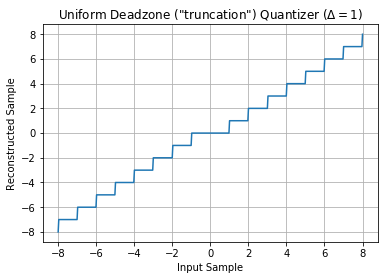

In [276]:
quantization_step = 1 # Delta
x = np.linspace(-8, 8, 500) # Input samples
y_T = midtread_quantizer(x, quantization_step) # Quantized samples
z_T = midtread_dequantizer(y_T, quantization_step) # Reconstructed samples
y_R = midrise_quantizer(x, quantization_step) # Quantized samples
z_R = midrise_dequantizer(y_R, quantization_step) # Reconstructed samples
y_D = deadzone_quantizer(x, quantization_step)
z_D = deadzone_dequantizer(y_D, quantization_step)
plot(x, z_T, "Input Sample", "Reconstructed Sample", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, z_R, "Input Sample", "Reconstructed Sample", "Uniform Midrise (\"floor\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, z_D, "Input Sample", "Reconstructed Sample", "Uniform Deadzone (\"truncation\") Quantizer ($\Delta={}$)".format(quantization_step))

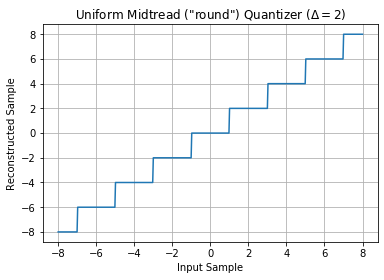

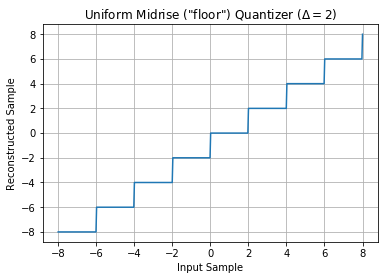

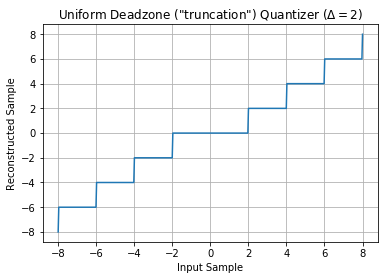

In [277]:
quantization_step = 2 # Delta
x = np.linspace(-8, 8, 500) # Input samples
y_T = midtread_quantizer(x, quantization_step) # Quantized samples
z_T = uniform_dequantizer(y_T, quantization_step) # Reconstructed samples
y_R = midrise_quantizer(x, quantization_step) # Quantized samples
z_R = uniform_dequantizer(y_R, quantization_step) # Reconstructed samples
y_D = deadzone_quantizer(x, quantization_step)
z_D = uniform_dequantizer(y_D, quantization_step)
plot(x, z_T, "Input Sample", "Reconstructed Sample", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, z_R, "Input Sample", "Reconstructed Sample", "Uniform Midrise (\"floor\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, z_D, "Input Sample", "Reconstructed Sample", "Uniform Deadzone (\"truncation\") Quantizer ($\Delta={}$)".format(quantization_step))

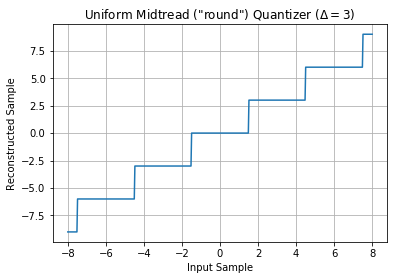

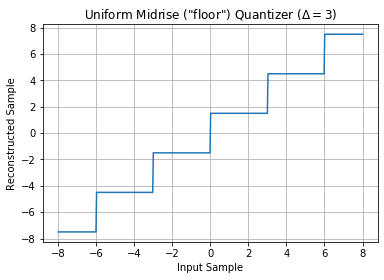

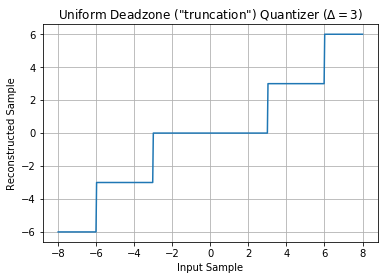

In [279]:
quantization_step = 3 # Delta
x = np.linspace(-8, 8, 500) # Input samples
y_T = midtread_quantizer(x, quantization_step) # Quantized samples
z_T = midtread_dequantizer(y_T, quantization_step) # Reconstructed samples
y_R = midrise_quantizer(x, quantization_step) # Quantized samples
z_R = midrise_dequantizer(y_R, quantization_step) # Reconstructed samples
y_D = deadzone_quantizer(x, quantization_step)
z_D = deadzone_dequantizer(y_D, quantization_step)
plot(x, z_T, "Input Sample", "Reconstructed Sample", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, z_R, "Input Sample", "Reconstructed Sample", "Uniform Midrise (\"floor\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, z_D, "Input Sample", "Reconstructed Sample", "Uniform Deadzone (\"truncation\") Quantizer ($\Delta={}$)".format(quantization_step))

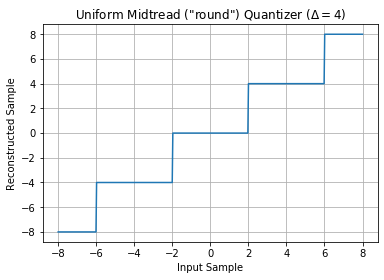

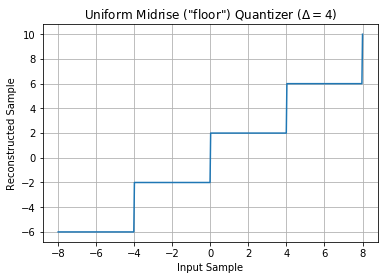

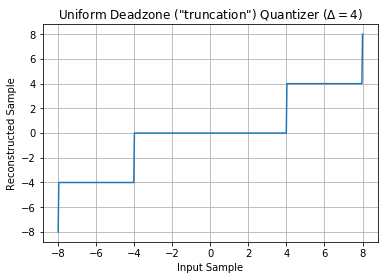

In [280]:
quantization_step = 4 # Delta
x = np.linspace(-8, 8, 500) # Input samples
y_T = midtread_quantizer(x, quantization_step) # Quantized samples
z_T = midtread_dequantizer(y_T, quantization_step) # Reconstructed samples
y_R = midrise_quantizer(x, quantization_step) # Quantized samples
z_R = midrise_dequantizer(y_R, quantization_step) # Reconstructed samples
y_D = deadzone_quantizer(x, quantization_step)
z_D = deadzone_dequantizer(y_D, quantization_step)
plot(x, z_T, "Input Sample", "Reconstructed Sample", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, z_R, "Input Sample", "Reconstructed Sample", "Uniform Midrise (\"floor\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, z_D, "Input Sample", "Reconstructed Sample", "Uniform Deadzone (\"truncation\") Quantizer ($\Delta={}$)".format(quantization_step))

## Quantization error comparative

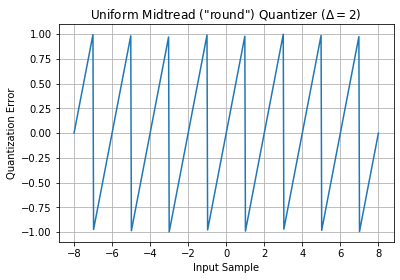

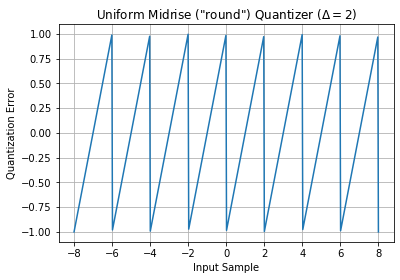

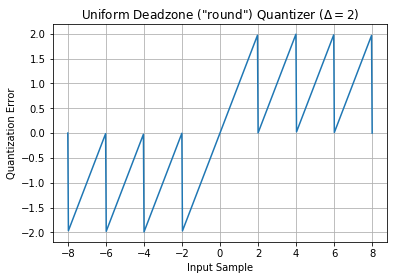

In [281]:
quantization_step = 2 # Delta
x = np.linspace(-8, 8, 500) # Input samples
y_T = midtread_quantizer(x, quantization_step) # Quantized samples
z_T = midtread_dequantizer(y_T, quantization_step) # Reconstructed samples
y_R = midrise_quantizer(x, quantization_step) # Quantized samples
z_R = midrise_dequantizer(y_R, quantization_step) # Reconstructed samples
y_D = deadzone_quantizer(x, quantization_step)
z_D = deadzone_dequantizer(y_D, quantization_step)
error_T = x - z_T
error_R = x - z_R
error_D = x - z_D
error_C = x - z_C
plot(x, error_T, "Input Sample", "Quantization Error", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, error_R, "Input Sample", "Quantization Error", "Uniform Midrise (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, error_D, "Input Sample", "Quantization Error", "Uniform Deadzone (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))
plot(x, error_C, "Input Sample", "Quantization Error", "Companded Deadzone $\mu$-Law Quantizer ($\mu={}, \Delta={}$)".format(mu, quantization_step))

## Working with signed integers of 16 bits

In [286]:
quantization_step = 2
x = np.linspace(-32768, 32767, 65536).astype(np.int16)
y_T = midtread_quantizer(x, quantization_step)
z_T = midtread_dequantizer(y_T, quantization_step)
y_R = midrise_quantizer(x, quantization_step)
z_R = midrise_dequantizer(y_R, quantization_step)
y_D = deadzone_quantizer(x, quantization_step)
z_D = deadzone_dequantizer(y_D, quantization_step)

In [290]:
n = 16
print(f"{'Midtread':>20s} {'Midrise':>20s} {'Deadzone':>20s}")
print(f"{'Input':>6s} {'Output':>6s} {'Recons':>6s} {'Input':>6s} {'Output':>6s} {'Recons':>6s} {'Input':>6s} {'Output':>6s} {'Recons':>6s}")
offset = (len(x)-n)//2
for i in range(n):
    input = int(x[i+offset])
    output_T = int(y_T[i+offset])
    recons_T = int(z_T[i+offset])
    print(f"{input:>6d} {output_T:>6d} {recons_T:>6d}", end='')
    output_R = int(y_R[i+offset])
    recons_R = int(z_R[i+offset])
    print(f" {input:>6d} {output_R:>6d} {recons_R:>6d}", end='')
    output_D = int(y_D[i+offset])
    recons_D = int(z_D[i+offset])
    print(f" {input:>6d} {output_D:>6d} {recons_D:>6d}")


            Midtread              Midrise             Deadzone
 Input Output Recons  Input Output Recons  Input Output Recons
    -8     -4     -8     -8     -4     -7     -8     -4     -8
    -7     -4     -8     -7     -4     -7     -7     -3     -6
    -6     -3     -6     -6     -3     -5     -6     -3     -6
    -5     -2     -4     -5     -3     -5     -5     -2     -4
    -4     -2     -4     -4     -2     -3     -4     -2     -4
    -3     -2     -4     -3     -2     -3     -3     -1     -2
    -2     -1     -2     -2     -1     -1     -2     -1     -2
    -1      0      0     -1     -1     -1     -1      0      0
     0      0      0      0      0      1      0      0      0
     1      0      0      1      0      1      1      0      0
     2      1      2      2      1      3      2      1      2
     3      2      4      3      1      3      3      1      2
     4      2      4      4      2      5      4      2      4
     5      2      4      5      2      5      5      2

In [12]:
len(np.unique(x, return_counts = True)[0])

65536

In [13]:
len(np.unique(y, return_counts = True)[0])

65536

Notice that for $\Delta=1$, the number of bits for representing the input and the output is the same: $65536$ different inputs are represented by $65536$ outputs.

#### A.a.2. Quantization with quantization step $\Delta=2$

In [14]:
quantization_step = 2 # Delta

#### Quantizer

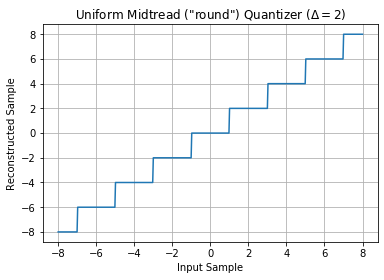

In [15]:
x = np.linspace(-8, 8, 500)
y = midtread_quantizer(x, quantization_step)
z = midtread_dequantizer(y, quantization_step)
plot(x, z, "Input Sample", "Reconstructed Sample", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))

#### Quantization error

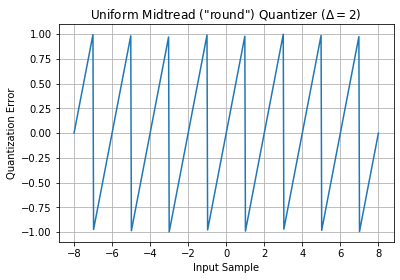

In [16]:
error = x - z
plot(x, error, "Input Sample", "Quantization Error", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))

#### Working with signed integers of 16 bits

In [17]:
x = np.linspace(-32768, 32767, 65536).astype(np.int16)
y = midtread_quantizer(x, quantization_step)
z = midtread_dequantizer(y, quantization_step)

In [18]:
print(f"{'Input':>6s} {'Output':>6s} {'Recons':>6s}")
print_center(x, y, z, 32)

 Input Output Recons
   -16     -8    -16
   -15     -8    -16
   -14     -7    -14
   -13     -6    -12
   -12     -6    -12
   -11     -6    -12
   -10     -5    -10
    -9     -4     -8
    -8     -4     -8
    -7     -4     -8
    -6     -3     -6
    -5     -2     -4
    -4     -2     -4
    -3     -2     -4
    -2     -1     -2
    -1      0      0
     0      0      0
     1      0      0
     2      1      2
     3      2      4
     4      2      4
     5      2      4
     6      3      6
     7      4      8
     8      4      8
     9      4      8
    10      5     10
    11      6     12
    12      6     12
    13      6     12
    14      7     14
    15      8     16


In [19]:
len(np.unique(y, return_counts = True)[0])

32769

For $\Delta=2$, a midtread uniform quantizer represents 65536 different inputs with 32769 outputs.

#### A.a.3. Quantization with quantization step $\Delta=3$

In [20]:
quantization_step = 3

#### Quantizer

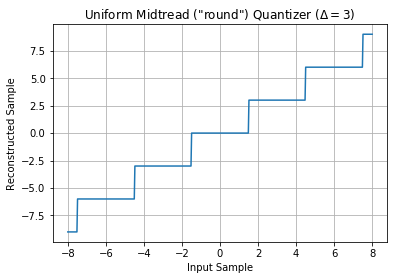

In [21]:
x = np.linspace(-8, 8, 500)
y = midtread_quantizer(x, quantization_step)
z = midtread_dequantizer(y, quantization_step)
plot(x, z, "Input Sample", "Reconstructed Sample", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))

#### Quantization error

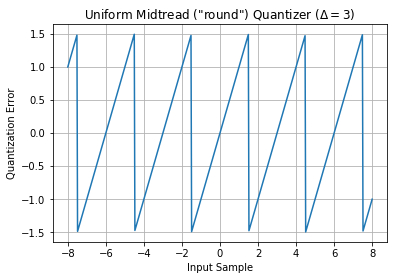

In [22]:
error = x - z
plot(x, error, "Input Sample", "Quantization Error", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))

#### Working with signed integers of 16 bits

In [23]:
x = np.linspace(-32768, 32767, 65536).astype(np.int16)
y = midtread_quantizer(x, quantization_step)
z = midtread_dequantizer(y, quantization_step)

In [24]:
print_center(x, y, z, 32)

   -16     -5    -15
   -15     -5    -15
   -14     -5    -15
   -13     -4    -12
   -12     -4    -12
   -11     -4    -12
   -10     -3     -9
    -9     -3     -9
    -8     -3     -9
    -7     -2     -6
    -6     -2     -6
    -5     -2     -6
    -4     -1     -3
    -3     -1     -3
    -2     -1     -3
    -1      0      0
     0      0      0
     1      0      0
     2      1      3
     3      1      3
     4      1      3
     5      2      6
     6      2      6
     7      2      6
     8      3      9
     9      3      9
    10      3      9
    11      4     12
    12      4     12
    13      4     12
    14      5     15
    15      5     15


In [25]:
len(np.unique(y, return_counts = True)[0])

21846

For $\Delta=3$, a midtread uniform quantizer represents 65536 different inputs with 21846 outputs.

### A.a.4. Quantization with $\Delta=4$

In [26]:
quantization_step = 4 # Delta

#### Quantizer

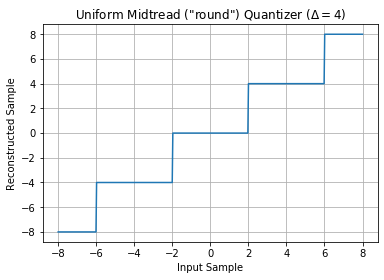

In [27]:
x = np.linspace(-8, 8, 500)
y = midtread_quantizer(x, quantization_step)
z = midtread_dequantizer(y, quantization_step)
plot(x, z, "Input Sample", "Reconstructed Sample", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))

#### Quantization error

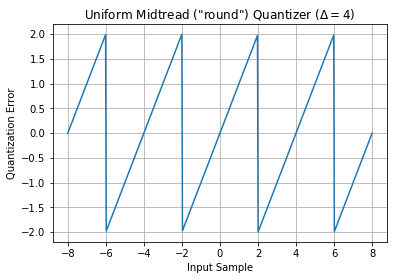

In [28]:
error = x - z
plot(x, error, "Input Sample", "Quantization Error", "Uniform Midtread (\"round\") Quantizer ($\Delta={}$)".format(quantization_step))

#### Working with signed integers of 16 bits

In [29]:
x = np.linspace(-32768, 32767, 65536).astype(np.int16)
y = midtread_quantizer(x, quantization_step)
z = midtread_dequantizer(y, quantization_step)

In [30]:
print(f"{'Input':>6s} {'Output':>6s} {'Recons':>6s}")
print_center(x, y, z, 32)

 Input Output Recons
   -16     -4    -16
   -15     -4    -16
   -14     -4    -16
   -13     -3    -12
   -12     -3    -12
   -11     -3    -12
   -10     -2     -8
    -9     -2     -8
    -8     -2     -8
    -7     -2     -8
    -6     -2     -8
    -5     -1     -4
    -4     -1     -4
    -3     -1     -4
    -2      0      0
    -1      0      0
     0      0      0
     1      0      0
     2      0      0
     3      1      4
     4      1      4
     5      1      4
     6      2      8
     7      2      8
     8      2      8
     9      2      8
    10      2      8
    11      3     12
    12      3     12
    13      3     12
    14      4     16
    15      4     16


In [31]:
len(np.unique(y, return_counts = True)[0])

16385

For $\Delta=1$, $65536$ different values are represented by $16385$ values.

### A.b. Deadzone ("truncation") Quantization

In [32]:
def deadzone_quantizer(x, quantization_step):
    return (x / quantization_step).astype(np.int)

In [33]:
def deadzone_dequantizer(y, quantization_step):
    return y * quantization_step

#### A.b.1. Quantization with $\Delta=2$

In [34]:
quantization_step = 2 # Delta

#### Quantizer

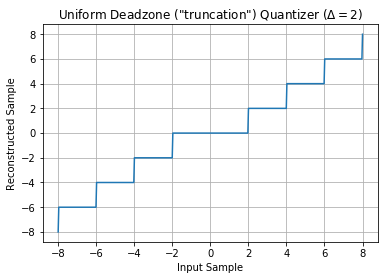

In [35]:
x = np.linspace(-8, 8, 500) # Input samples


#### Quantization error

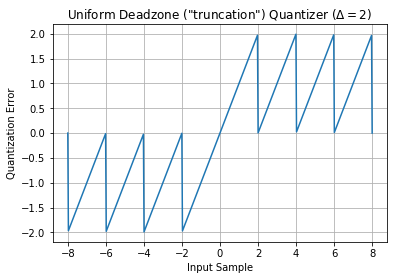

In [36]:
error = x - z
plot(x, error, "Input Sample", "Quantization Error", "Uniform Deadzone (\"truncation\") Quantizer ($\Delta={}$)".format(quantization_step))

#### Compute output for each possible input using 16 bits

In [37]:
x = np.linspace(-32768, 32767, 65536).astype(np.int16)
y = deadzone_quantizer(x, quantization_step)
z = deadzone_dequantizer(y, quantization_step)

In [38]:
print_center(x, y, z, 32)

   -16     -8    -16
   -15     -7    -14
   -14     -7    -14
   -13     -6    -12
   -12     -6    -12
   -11     -5    -10
   -10     -5    -10
    -9     -4     -8
    -8     -4     -8
    -7     -3     -6
    -6     -3     -6
    -5     -2     -4
    -4     -2     -4
    -3     -1     -2
    -2     -1     -2
    -1      0      0
     0      0      0
     1      0      0
     2      1      2
     3      1      2
     4      2      4
     5      2      4
     6      3      6
     7      3      6
     8      4      8
     9      4      8
    10      5     10
    11      5     10
    12      6     12
    13      6     12
    14      7     14
    15      7     14


In [39]:
len(np.unique(y, return_counts = True)[0])

32768

Using $\Delta=2$, a deadzone quantizer represents 65536 samples with 32768 representation levels.

### A.c. Midrise ("floor") Quantization

In [193]:
def midrise_quantizer(x, quantization_step):
    return np.floor((x+1) / quantization_step).astype(np.int)

In [194]:
def midrise_dequantizer(y, quantization_step):
    return y * quantization_step

#### A.b.1. Quantization with $\Delta=2$

In [195]:
quantization_step = 2 # Delta

#### Quantizer

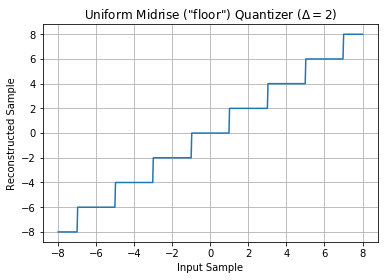

#### Quantization error

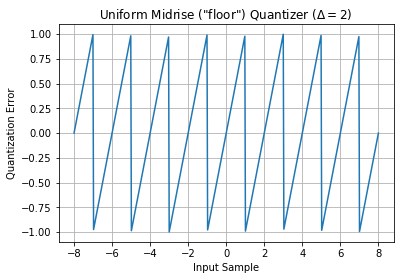

In [192]:
error = x - z
plot(x, error, "Input Sample", "Quantization Error", "Uniform Midrise (\"floor\") Quantizer ($\Delta={}$)".format(quantization_step))

#### Compute output for each possible input using 16 bits

In [37]:
x = np.linspace(-32768, 32767, 65536).astype(np.int16)
y = midrise_quantizer(x, quantization_step)
z = midrise_dequantizer(y, quantization_step)

In [38]:
print_center(x, y, z, 32)

   -16     -8    -16
   -15     -7    -14
   -14     -7    -14
   -13     -6    -12
   -12     -6    -12
   -11     -5    -10
   -10     -5    -10
    -9     -4     -8
    -8     -4     -8
    -7     -3     -6
    -6     -3     -6
    -5     -2     -4
    -4     -2     -4
    -3     -1     -2
    -2     -1     -2
    -1      0      0
     0      0      0
     1      0      0
     2      1      2
     3      1      2
     4      2      4
     5      2      4
     6      3      6
     7      3      6
     8      4      8
     9      4      8
    10      5     10
    11      5     10
    12      6     12
    13      6     12
    14      7     14
    15      7     14


In [39]:
len(np.unique(y, return_counts = True)[0])

32768

Using $\Delta=2$, a deadzone quantizer represents 65536 samples with 32768 representation levels.

#### Quantization error

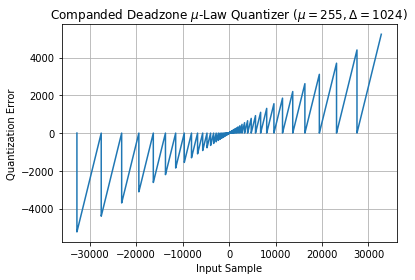

In [46]:
error = x - z


In [47]:
mu = 255
quantization_step = 128
x = np.linspace(-32768, 32767, 65536)
x_compressed = (32768*(muLaw_compress(x/32768, mu)))
y = deadzone_quantizer(x_compressed, quantization_step)
z_compressed = deadzone_dequantizer(y, quantization_step)
z = np.round(32768*muLaw_expand(z_compressed/32768, mu)).astype(np.int16)
print(f"{'Input':>6s} {'Output':>6s} {'Recons':>6s}")
print_center(x, y, z, 32)

 Input Output Recons
   -16     -5    -15
   -15     -5    -15
   -14     -4    -12
   -13     -4    -12
   -12     -4    -12
   -11     -3     -9
   -10     -3     -9
    -9     -3     -9
    -8     -2     -6
    -7     -2     -6
    -6     -2     -6
    -5     -1     -3
    -4     -1     -3
    -3     -1     -3
    -2      0      0
    -1      0      0
     0      0      0
     1      0      0
     2      0      0
     3      1      3
     4      1      3
     5      1      3
     6      2      6
     7      2      6
     8      2      6
     9      3      9
    10      3      9
    11      3      9
    12      4     12
    13      4     12
    14      4     12
    15      5     15


In [48]:
len(np.unique(y, return_counts = True)[0])

512

For $\Delta=128$, a companded deadzone $\mu$-law quantizer represents a 16-bits input sample with only one of 512 possible representation levels (9 bits/output), but notice that at the center of the dynamic range (which corresponds to the input samples that are closer to 0) the quantization error is smaller than 3, except for the deadzone in which the quantization error is smaller that 5.

# Which performs better for an audio signal?

In [54]:
def midtread_quantization(x, quantization_step):
    y = midtread_quantizer(x, quantization_step)
    z = midtread_dequantizer(y, quantization_step)
    return y, z

In [55]:
def deadzone_quantization(x, quantization_step):
    y = deadzone_quantizer(x, quantization_step)
    z = deadzone_dequantizer(y, quantization_step)
    return y, z

In [152]:
def companded_quantization(x, quantization_step):
    mu = 255
    x_compressed = (32768*(muLaw_compress(x/32768, mu)))
    y = deadzone_quantizer(x_compressed, quantization_step)
    #y = midtread_quantizer(x_compressed, quantization_step)
    z_compressed = deadzone_dequantizer(y, quantization_step)
    #z_compressed = midtread_dequantizer(y, quantization_step)
    z = np.round(32768*muLaw_expand(z_compressed/32768, mu)).astype(np.int16)
    return y, z

## Subjective comparative

In [114]:
import sounddevice as sd
fs = 44100
duration = 5.0  # seconds
x = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
print("Speak!")
while sd.wait():
    pass
print("done")

Speak!
done


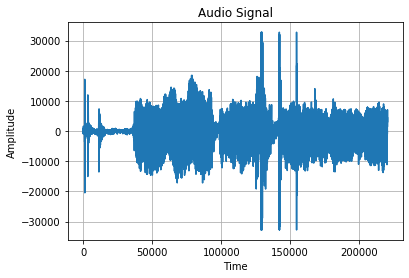

In [136]:
sd.play(x)
plot(np.linspace(0, len(x)-1, len(x)), x, "Time", "Amplitude", "Audio Signal")

In [149]:
quantization_step = 2000

In [153]:
y_M, z_M = midtread_quantization(x, quantization_step)
z_M = z_M.astype(np.int16)
y_D, z_D = deadzone_quantization(x, quantization_step)
z_D = z_D.astype(np.int16)
y_C, z_C = companded_quantization(x, quantization_step)
z_C = z_C.astype(np.int16)

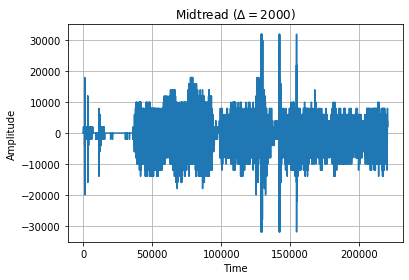

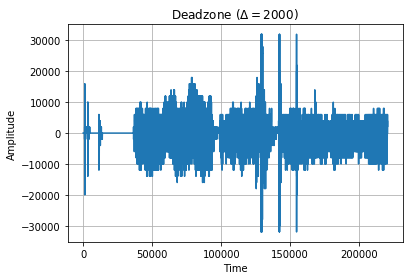

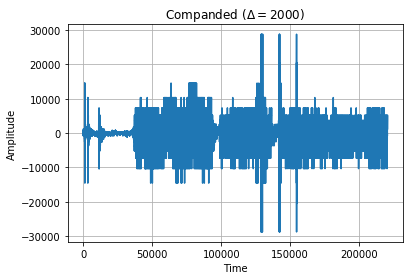

In [154]:
sd.play(z_M)
sd.play(z_D)
sd.play(z_C)
plot(np.linspace(0, len(z_M)-1, len(z_M)), z_M, "Time", "Amplitude", "Midtread ($\Delta={}$)".format(quantization_step))
plot(np.linspace(0, len(z_D)-1, len(z_D)), z_D, "Time", "Amplitude", "Deadzone ($\Delta={}$)".format(quantization_step))
plot(np.linspace(0, len(z_C)-1, len(z_C)), z_C, "Time", "Amplitude", "Companded ($\Delta={}$)".format(quantization_step))

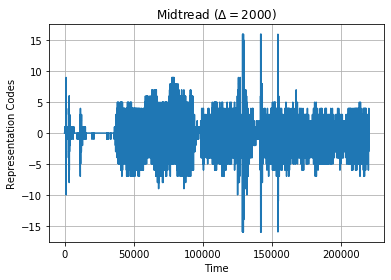

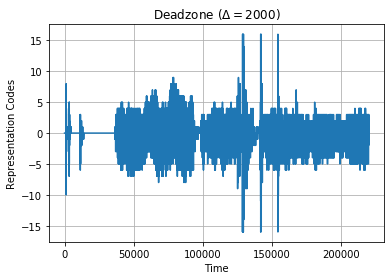

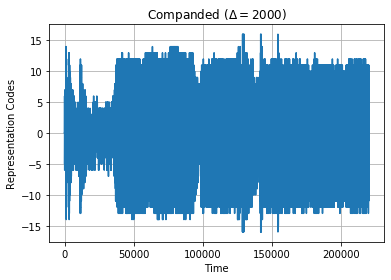

In [155]:
plot(np.linspace(0, len(y_M)-1, len(y_M)), y_M, "Time", "Representation Codes", "Midtread ($\Delta={}$)".format(quantization_step))
plot(np.linspace(0, len(y_D)-1, len(y_D)), y_D, "Time", "Representation Codes", "Deadzone ($\Delta={}$)".format(quantization_step))
plot(np.linspace(0, len(y_C)-1, len(y_C)), y_C, "Time", "Representation Codes", "Companded ($\Delta={}$)".format(quantization_step))

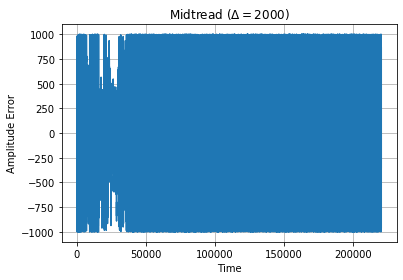

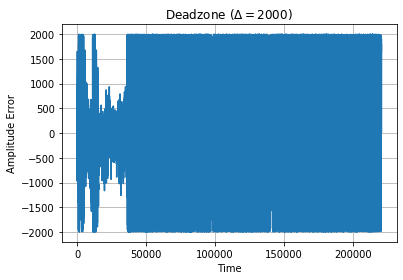

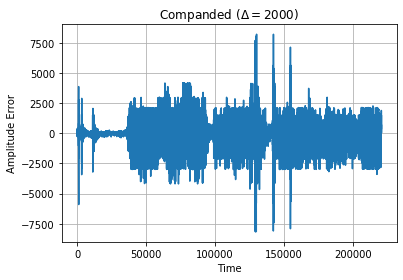

In [156]:
error_M = x - z_M
error_D = x - z_D
error_C = x - z_C
sd.play(error_M)
sd.play(error_D)
sd.play(error_C)
plot(np.linspace(0, len(z_M)-1, len(z_M)), error_M, "Time", "Amplitude Error", "Midtread ($\Delta={}$)".format(quantization_step))
plot(np.linspace(0, len(z_D)-1, len(z_D)), error_D, "Time", "Amplitude Error", "Deadzone ($\Delta={}$)".format(quantization_step))
plot(np.linspace(0, len(z_C)-1, len(z_C)), error_C, "Time", "Amplitude Error", "Companded ($\Delta={}$)".format(quantization_step))

## Objective comparative

### Using RMSE 

In [157]:
def average_energy(x):
    return np.sum(x.astype(np.double)*x.astype(np.double))/len(x)

In [158]:
def RMSE(x, y):
    error_signal = x - y
    return math.sqrt(average_energy(error_signal))

In [159]:
# Based on https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python
def entropy_in_bits_per_symbol(sequence_of_symbols):
    value, counts = np.unique(sequence_of_symbols, return_counts = True)
    probs = counts / len(sequence_of_symbols)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    entropy = 0.
    for i in probs:
        entropy -= i * math.log(i, 2)

    return entropy

In [160]:
def RD_curve(x, quantization):
    RD_points = []
    for q_step in range(1, 32768, 32):
        y, z = quantization(x, q_step)
        rate = entropy_in_bits_per_symbol(y)
        distortion = RMSE(x, z)
        RD_points.append((rate, distortion))
    return RD_points

In [161]:
midtread_RD_points = RD_curve(x, midtread_quantization)
deadzone_RD_points = RD_curve(x, deadzone_quantization)
companded_RD_points = RD_curve(x, companded_quantization)

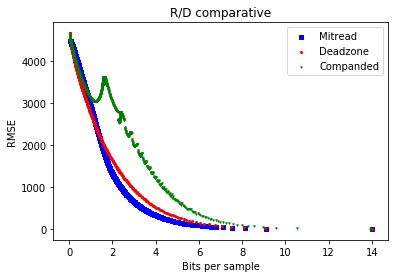

In [164]:
plt.title("R/D comparative")
plt.xlabel("Bits per sample")
plt.ylabel("RMSE")
plt.scatter(*zip(*midtread_RD_points), s=12, c='b', marker="s", label='Mitread')
plt.scatter(*zip(*deadzone_RD_points), s=4, c='r', marker="o", label='Deadzone')
plt.scatter(*zip(*companded_RD_points), s=2, c='g', marker="v", label='Companded')
plt.legend(loc='upper right')
plt.show()

### Using a logaritmic version of RMSE

In [175]:
def log_average_energy(x):
    '''In fact, average logaritmic energy.'''
    return np.sum(np.log(np.abs(x.astype(np.double))+1)*np.log(np.abs(x.astype(np.double))+1))/len(x)

In [176]:
def log_RMSE(x, y):
    error_signal = x - y
    return math.sqrt(log_average_energy(error_signal))

In [177]:
def log_RD_curve(x, quantization):
    RD_points = []
    for q_step in range(1, 32768, 32):
        y, z = quantization(x, q_step)
        rate = entropy_in_bits_per_symbol(y)
        distortion = log_RMSE(x, z)
        RD_points.append((rate, distortion))
    return RD_points

In [178]:
log_midtread_RD_points = log_RD_curve(x, midtread_quantization)
log_deadzone_RD_points = log_RD_curve(x, deadzone_quantization)
log_companded_RD_points = log_RD_curve(x, companded_quantization)

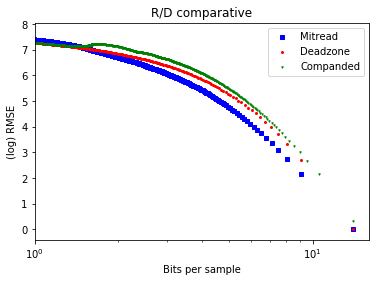

In [179]:
plt.title("R/D comparative")
plt.xlabel("Bits per sample")
plt.ylabel("(log) RMSE")
plt.yscale("linear")
plt.xscale("log")
plt.xlim(1, 16)
plt.scatter(*zip(*log_midtread_RD_points), s=12, c='b', marker="s", label='Mitread')
plt.scatter(*zip(*log_deadzone_RD_points), s=4, c='r', marker="o", label='Deadzone')
plt.scatter(*zip(*log_companded_RD_points), s=2, c='g', marker="v", label='Companded')
plt.legend(loc='upper right')
plt.show()

In [ ]:

def SNR(x, y):
    signal_energy = compute_average_energy(x)
    error_energy = compute_average_energy(x-y)
    print("signal energy =", signal_energy)
    print("error energy =", error_energy)
    return 10*math.log(signal_energy/error_energy)